# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -**   Girish R

# **Project Summary -**

YES BANK is a well-known bank in the Indian financial domain; it has been in the news since 2018 due to a fraud case; we have been provided with a dataset that contains monthly stock price data for the bank since its inception, including the closing price, opening price, highest price, and lowest price of each month. The main goal is to predict the closing price of the stock for the month by developing a machine learning regression model with the highest accuracy score.


For understanding and comparing OPEN, HIGH, and LOW pricing, we have used a variety of charts. We developed a total of three machine learning (ML) models for price prediction. The first model employed the linear regression machine learning technique, the second model the lasso regression algorithm, and the third model the ridge regression algorithm.

# **GitHub Link -**

https://github.com/GirishRGowda/Capstone_project_ML_Regression_Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


### **To predict the future price of YES BANK's stock on the National Stock Exchange using a machine learning model of linear regression. We must create a model that will assist us in predicting future stock closing prices.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bankds = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
bankds.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
bankds.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bankds.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
bankds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bankds.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bankds.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# No Missing Values

### What did you know about your dataset?

1. We have been given month-by-month data for Opening Price, Highest Price, Lowest Price, and Closing Price in this dataset. There are 185 rows and 5 columns altogether. Data is available from July 2005 through November 2020.

2. In this dataset, there are no duplicate, missing, or null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bankds.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
bankds.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

1. We have 185 rows with "open price," "high price," "low price," and "close price".

2. The most affordable price The stock price of Yes Bank that has been touched is 5.55 Rs.

3. The highest price reached by YES Bank stock is 404.00 Rs.

### Check Unique Values for each variable.

In [ ]:
print(bankds.nunique())

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
Feature = bankds.loc[:, ['Open', 'High', 'Low']]
Target = bankds['Close']

In [ ]:
bankds['Date'] = pd.to_datetime(bankds['Date'], format='%b-%y')

In [ ]:
bankds['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
#setting Date column as index
bankds.set_index('Date',inplace=True)

In [ ]:
bankds.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

We're importing datetime here so that we can convert the date to the proper format.

1. The "Date" column is converted to a datetime type using the format "%b-%y."
2. Sets the "Date" column as the dataframe's index.

The date format We entered the date in mm-yy format, which was then converted to the proper format of yyyy-mm-dd, and the date column has dtype as an object, converting it into date-time format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

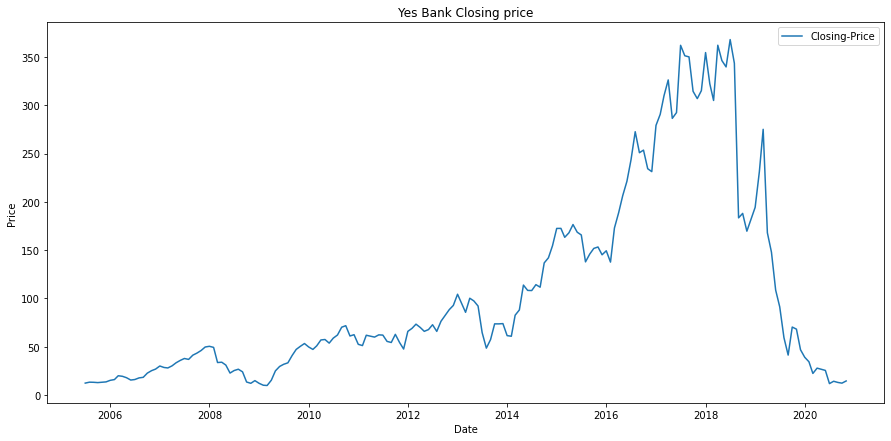

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,7))
plt.plot(bankds['Close'])
plt.legend(['Closing-Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

This graph clearly explains and shows the closing price from July 2005 to November 2020.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart that there was a good price increase from July 2005 to 2018 and that there was an uptrend, making it an excellent opportunity to invest. Around July 2005, the price ranged between 5 and 10 rupees, and by 2018, it had risen to a peak of more than 350 rupees.

After the Rana Kapoor scandal, which occurred in 2018, the stock price started to decline and there was a sharp downward trend; in or near 2020, the price returned to its level of roughly 5 to 10 rupees per share from July 2005.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can contribute to having a good business impact. This is evident from the upward trend in the stock price from July 2005 to 2018—a period that was profitable for investors—and the subsequent downward trend in the market price following the Rana Kapoor hoax.

#### Chart - 2

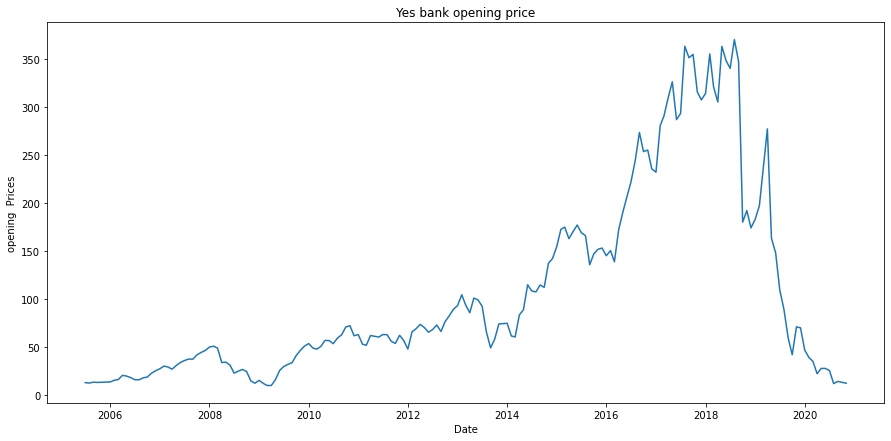

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('opening  Prices')
plt.plot(bankds['Open'])
plt.title('Yes bank opening price')
plt.show()

1. Why did you pick the specific chart?

This graph clearly explains and shows the opening price from July 2005 to November 2020.

Insight-

So, in this graph, we can see that the graph for Yes Bank's opening price and closing price have the same result. The opening price began to rise in 2014 and reached a high in 2018. However, it began to fall steadily after 2018, eventually reaching zero in 2020, the same year as Yes Bank's closing price.

#### Chart-3

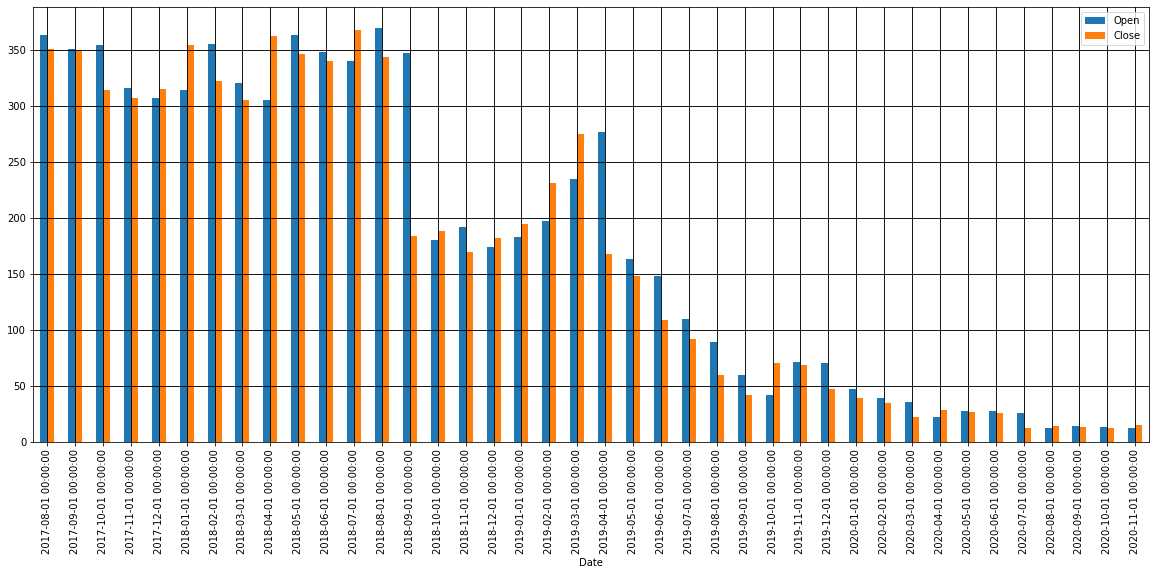

In [ ]:
# Chart - 3 visualization code
#Plot Open vs Close
bankds.loc[:, ['Open', 'Close']].tail(40).plot(kind='bar', figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='brown')
plt.show()

##### 1. Why did you pick the specific chart?

 The chart shows the trend of Open and Close prices over time.Blue bar indicates opening price of that month, orange bar indicates closing price of that month.

##### 2. What is/are the insight(s) found from the chart?

The graph above indicates that after 2018, the stock price of YES Bank drops, making it unwise for investors to place their money in the company.
  1. The closing price reached its peak 4 times of above 350Rs, in the month of August 2017, January 2018, April 2018, July 2018.

  2. The opening and closing prices were at lowest during these 4 months - August 2020, September 2020, October 2020, November 2020.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the stock price of YES Bank has dropped after 2018 suggests that the company may be facing challenges and may not be performing well, which could lead to a negative impact on the business. This insight may discourage potential investors from investing in the company and could lead to negative growth.

#### Chart - 4

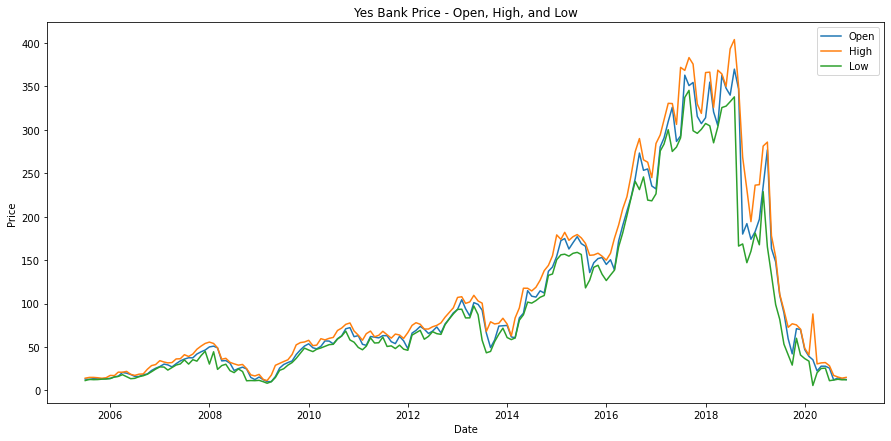

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,7))
plt.plot(bankds['Open'], label='Open')
plt.plot(bankds['High'], label='High')
plt.plot(bankds['Low'], label='Low')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Price - Open, High, and Low')
plt.show()

##### 1. Why did you pick the specific chart?

With the help of this graph, we can clearly understand and see our independent variables' open, high, and low prices from July 2005 to November 2020.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart that there was a good price increase from July 2005 to 2018 and that there was an uptrend, making it an excellent opportunity to invest. Around July 2005, the price ranged between 5 and 10 rupees, and by 2018, it had risen to a peak of more than 350 rupees.

Following the Rana Kapoor scandal in 2018, the stock price started to decline and experienced a sharp decline; in approximately 2020, it returned to its July 2005 level of between 5 and 10 rupees.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see from the uptrend in the stock price from July 2005 to 2018, which was a beneficial time for investors, and the downtrend in the stock price after the Rana Kapoor fraud.

#### Chat-5 

Text(0.5, 1.0, '')

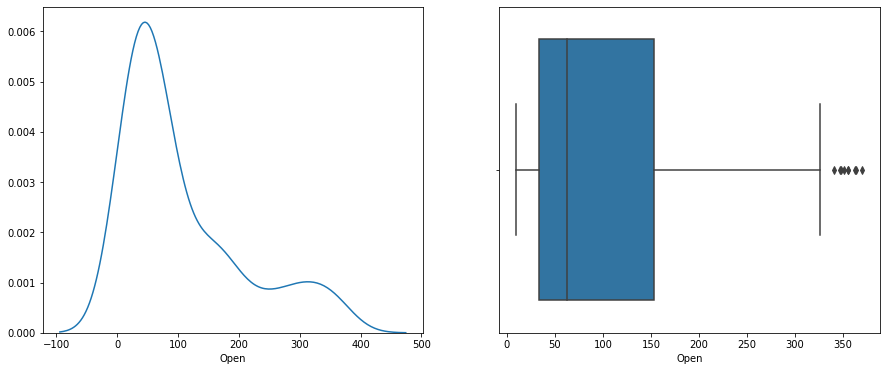

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(bankds['Open'], ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('Open')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(bankds['Open'], ax=ax2)
ax2.set_title('')

1. Why did you pick the specific chart?

 Above chart was picked for density visualisation of the opening price and Visualizing outliers.

2. What is/are the insight(s) found from the chart?

 By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs wit the peak at around 60Rs The outliers are around 350Rs price range

3. Will the gained insights help creating a positive business impact?

 Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea

#### Chart-6

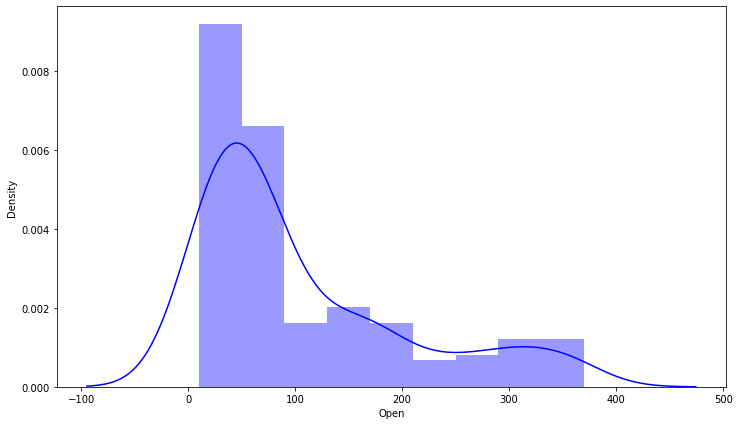

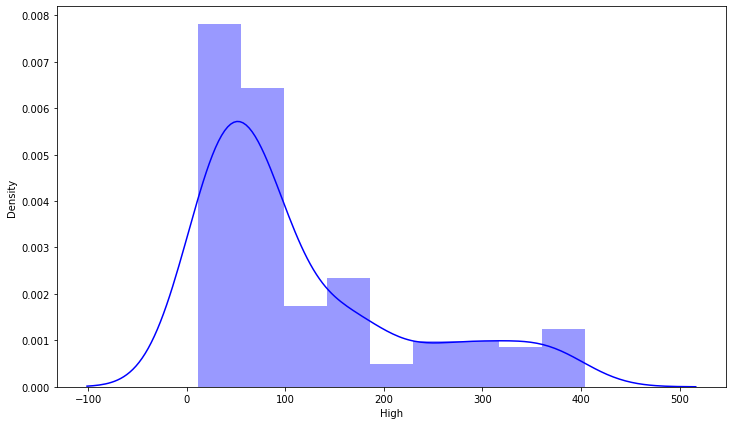

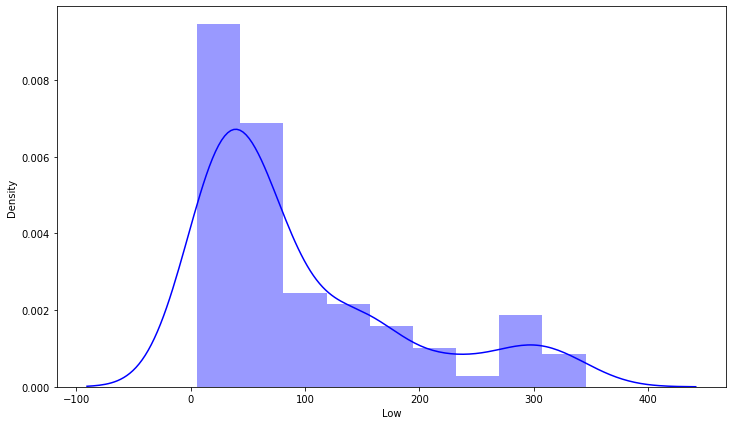

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,7))
sns.distplot(bankds['Open'], color='blue')

plt.figure(figsize=(12,7))
sns.distplot(bankds['High'], color='blue')

plt.figure(figsize=(12,7))
sns.distplot(bankds['Low'], color='blue')

1. Why did you pick the specific chart?

   The above chart was chosen for a better understanding of the density distribution visualisation of the month's Open, Close, lowest price.

2. What is/are the insight(s) found from the chart?

 Based on the above chart, we can conclude that the density of YES BANK stock low prices is greatest between 5Rs and 60Rs, and it gradually decreases after 100Rs.

3. Will the gained insights help creating a positive business impact?

  Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, by understanding the density of open, high, low price of YES BANK stock price we can say that the chances of stock price closing between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 7

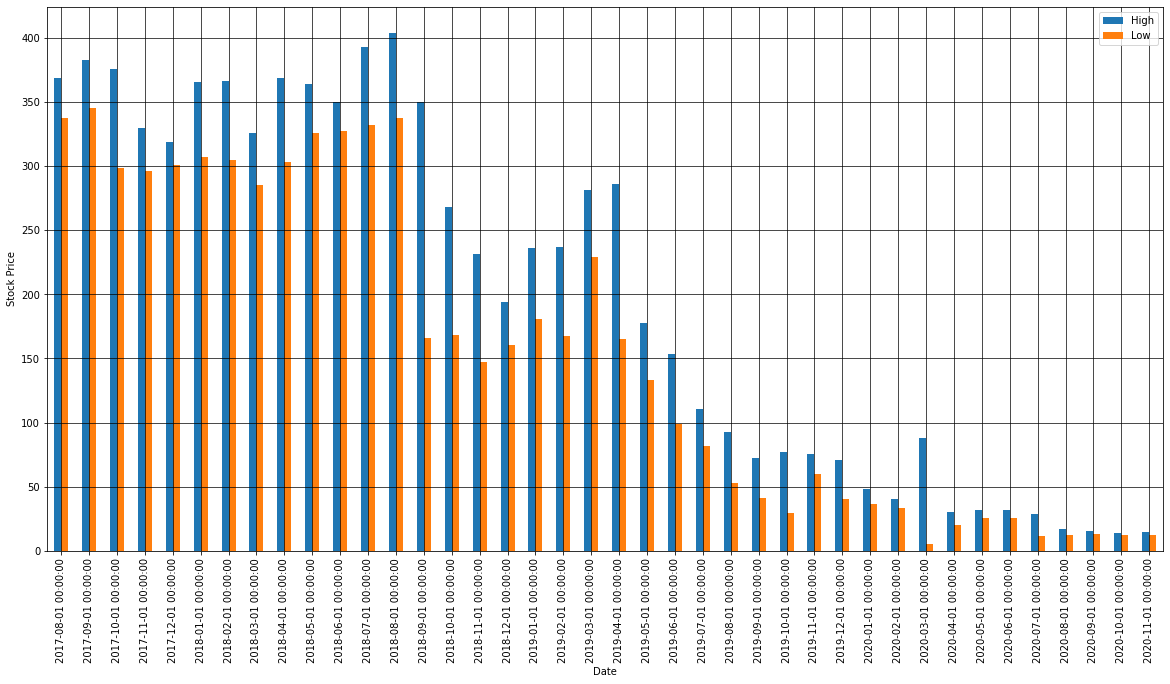

In [ ]:
# Chart - 7 visualization code
bankds[['High','Low']].tail(40).plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

1. What is/are the insight(s) found from the chart?

The above chart provides information on the high and low prices for each month from 2017 to 2020.

#### Chart - 8

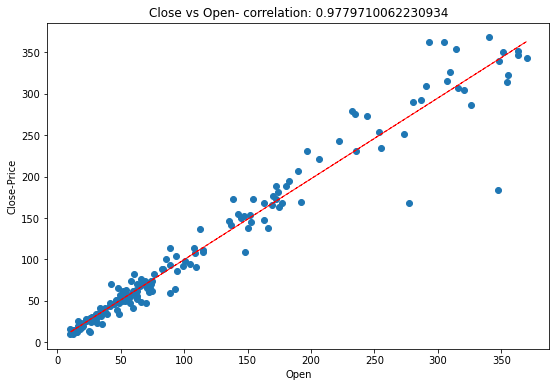

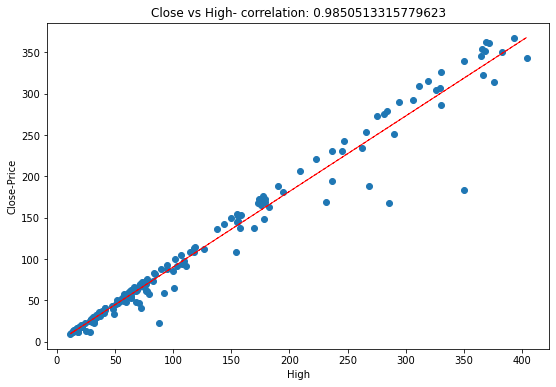

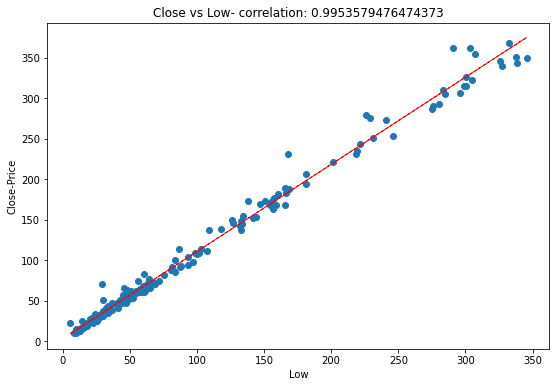

In [ ]:
#scatter plot between dependent variable with all independent variables.
for col in Feature[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bankds[col]
    label = bankds['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close-Price')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bankds[col], bankds['Close'], 1)
    y_hat = np.poly1d(z)(bankds[col])

    plt.plot(bankds[col], y_hat, "r--", lw=1)

plt.show()
     


##### 1. Why did you pick the specific chart?

Here we selected 3 scatter charts to understand the correlation between Close price and Open price, Close price and High price, Close price and Low price

##### 2. What is/are the insight(s) found from the chart?

All three graphs show a positive relationship. The correlation between the Close-Open chart is 0.9779. The correlation between the Close-High chart is 0.9850. The correlation for the Close-Low chart is 0.9953. When compared to the opening price, the chances of the stock closing at a low are greater.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can aid with improving business outcomes.
We can say that the Close-Low chart has the highest correlation (0.9953), followed by the Close-High chart (0.9850), and the least is the Close-Open chart (0.9779). If we want to know the closing price, we can choose the low price correlation because the chances of the stock price closing at a low price are the highest.

#### Chart - 9 - Correlation Heatmap

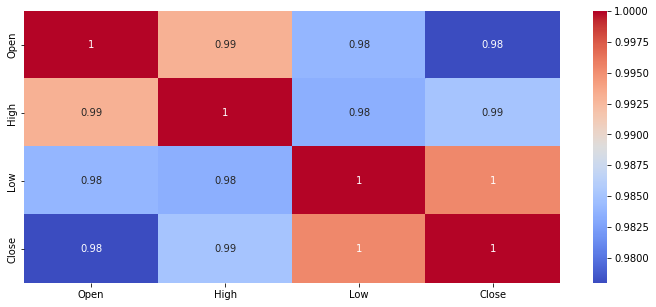

In [ ]:
# Correlation Heatmap visualization code
corr=bankds.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot = True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

This graph was chosen to show the price relationship between Close, Open, High, and Low.

##### 2. What is/are the insight(s) found from the chart?

According to the chart's interpretation, the relationship between low and close is the strongest, followed by high and close, and open and close has the weakest relationship.

#### Chart - 10 - Pair Plot 

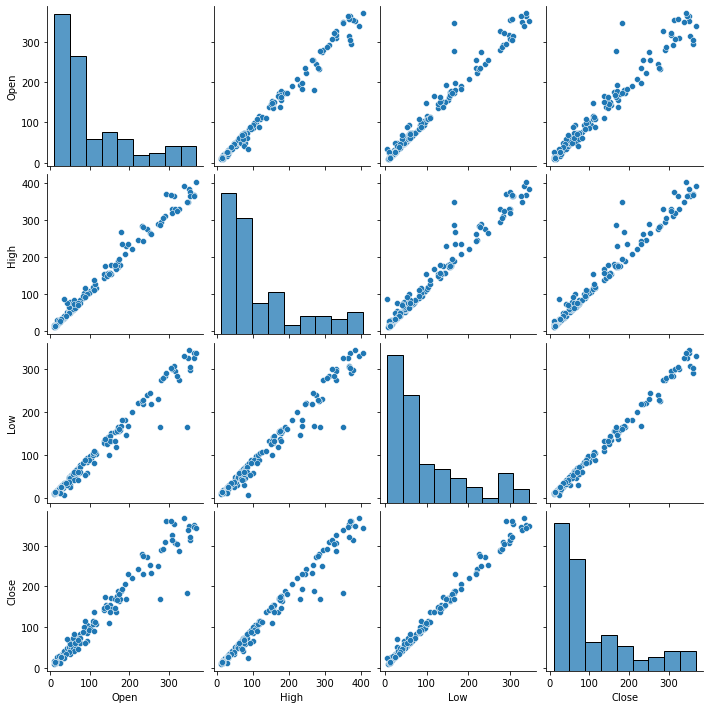

In [ ]:
# Pair Plot visualization code
sns.pairplot(bankds)

##### 1. Why did you pick the specific chart?

We can use the Seaborn Pairplot to visualise pairwise relationships between variables in a dataset. This creates a nice visualisation and aids in data comprehension by condensing a large amount of data into a single figure.

# **5. Feature Engineering & Data Pre-processing**

## **Feature Manipulation & Selection**

### 1. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#VIF score (Variance Inflation Factor method)

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(Feature)

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


**What all feature selection methods have you used and why?**

Variance Inflation Factor method. VIF is used to detect the degree of multicollinearity among the features in the linear regression model

**Which all features you found important and why?**

Even though we have high VIF scores, we will not perform feature engineering because each feature is essential for this particular use case. In practice, most indicators use all of these characteristics to forecast future values.

### 2. Data Transformation

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Because of the data being moderately right skewed we will be using log transformation for normal distribution.

In [ ]:
#Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(bankds[independent_var])

In [ ]:
y = np.log10(bankds['Close'])

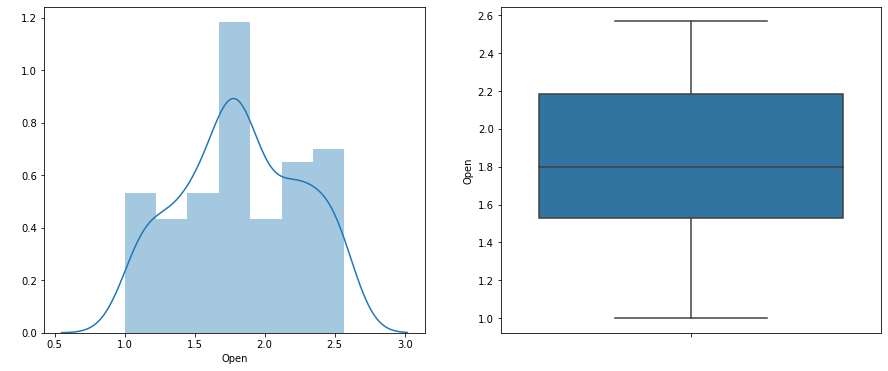

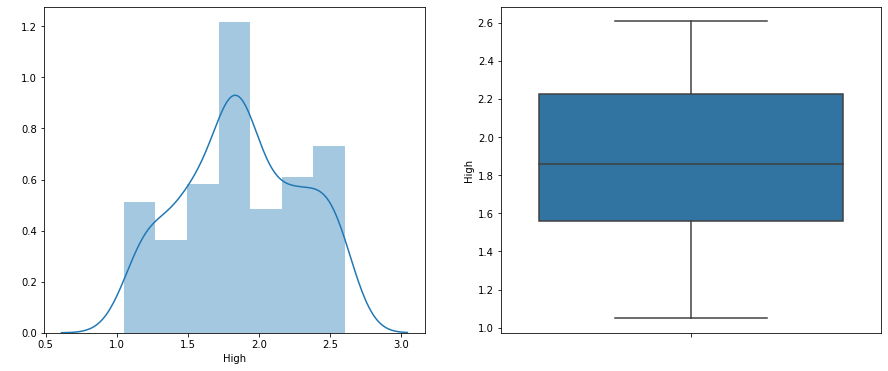

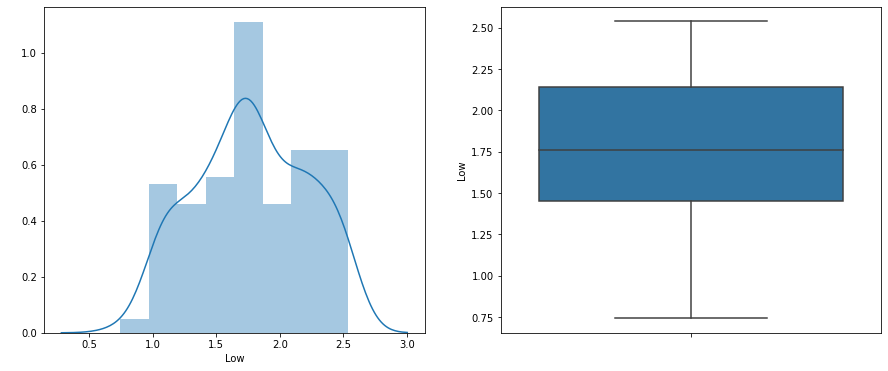

In [ ]:
# Transform Your data
for var in Feature:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(bankds[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(bankds[var]))
    fig.set_title('')
    fig.set_ylabel(var)

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


### **What data splitting ratio have you used and why?**



We used Train test split. A split of 80-20 % is done on Train and Test respectively, beacuse its considered to be optimum split.

## ***6. ML Model Implementation***

### **ML Model - 1** **Linear Regression**

In [ ]:
# Create a Linear Regression Object
reg = LinearRegression()

# Fit the Linear Regression Model to the training data
reg.fit(X_train, y_train)

# Evaluate the performance of the model using R^2 score on the training data
r2_score = reg.score(X_train, y_train)
print(r2_score)


0.9947900553430551


In [ ]:
reg.coef_

In [ ]:
y_pred = reg.predict(X_test)

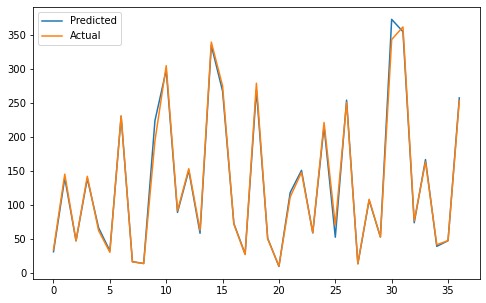

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating performance metrices 
from sklearn.metrics import r2_score
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**y_test, 10**y_pred)
print("R2 :" ,r2)

adj_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", adj_r2)


MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


### **ML Model - 2  Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.6790589204250228

In [ ]:
y_pred_1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
mse = mean_squared_error(y_test, y_pred_1)
print("MSE :", mse)

rmse = math.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred_1)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred_1)
print("R2 :", r2)


MSE : 0.06791265432425676
RMSE : 0.2606005647044088
MAE : 0.22004984010599196
R2 : 0.6354315886987754


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The value of the best-fit alpha is found to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The value of the best-fit alpha is found to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

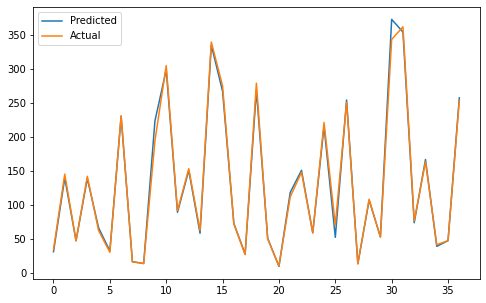

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For higher accuracy on test data and to prevent the model lasso from becoming overfit, we used cross validation and hyper parameter adjustment.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen because of the less accuracy than our first model.

### **ML Model - 3 Ridge Regression**

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937372031772778


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 84.54874728831831
RMSE : 9.195039276061756
R2 : 0.9924884968230997
Adjusted R2 :  0.9918056328979269


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
# Predict on the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The value of the best-fit alpha is found to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The value of the best-fit alpha is found to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528594


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

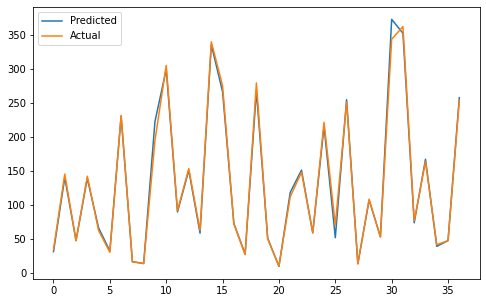

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

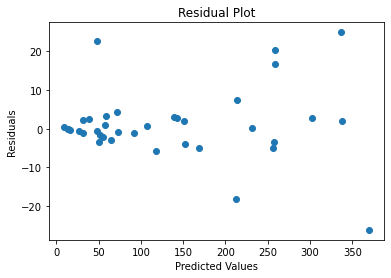

In [ ]:
# Heteroscadacity
residuals = np.power(10, y_test) - np.power(10, y_pred_r)
plt.scatter(np.power(10, y_pred_r), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
10**(y_pred)

array([ 30.99022321, 139.52578767,  47.20003592, 138.76152873,
        66.37639853,  32.206864  , 230.16454023,  16.42303081,
        13.71334173, 224.1008932 , 298.51460785,  88.88870295,
       150.66523923,  58.19270977, 334.91417497, 267.4982992 ,
        72.58931932,  27.6478609 , 269.36866298,  50.86829167,
         9.36641666, 118.27864101, 150.80557678,  58.74722774,
       215.69416746,  52.38597016, 254.18932917,  13.25902053,
       106.83558252,  52.83631572, 373.11141493, 355.02808635,
        73.66401224, 166.69688337,  38.94179495,  47.31812705,
       257.53151773])

In [ ]:
10**(y_test)

Date
2008-04-01     34.06
2015-12-01    145.23
2019-12-01     46.95
2014-11-01    142.08
2010-08-01     62.22
2007-01-01     30.16
2016-12-01    231.26
2006-02-01     16.12
2005-12-01     13.71
2019-01-01    194.30
2018-03-01    304.90
2019-07-01     91.30
2015-11-01    153.30
2011-06-01     62.38
2018-06-01    339.60
2019-03-01    275.05
2010-10-01     71.86
2008-08-01     26.83
2017-01-01    279.10
2010-01-01     49.84
2009-03-01      9.98
2014-09-01    111.70
2019-05-01    147.95
2010-07-01     58.99
2016-06-01    221.30
2019-10-01     70.45
2016-09-01    250.85
2005-11-01     13.41
2014-07-01    108.21
2011-01-01     52.59
2018-08-01    343.40
2017-07-01    361.96
2012-09-01     76.44
2015-03-01    163.31
2007-09-01     41.36
2010-02-01     47.32
2016-10-01    253.52
Name: Close, dtype: float64

## **Matrices Comaparision**

In [ ]:
models = [reg,lasso,ridge]

In [ ]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        # MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        # df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [ ]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,Rsquare
0,LinearRegression,0.017,0.001,0.029,0.996
2,Ridge,0.024,0.002,0.042,0.991
1,Lasso,0.220,0.068,0.261,0.635


### 1. Which ML model did you choose from the above created models as your final prediction model and why?

We chose our first and third models, simple linear regression and ridge regression, for final prediction because they have higher prediction accuracy than lasso, have the lowest mean squared error, and have high evalution metrics scores.

# **Conclusion**

We start with data wrangling, then move on to data cleaning and transformation, and finally to modelling.

In the EDA section, we conclude from our dataset that: the stock's closing price decreased after the year 2018, primarily due to the Rana Kapoor case, which severely impacted the stock price. The graph for Yes BANK's opening and closing prices shows the same result. The point is that the YES BANK stock price falls after 2018, making it unwise for investors to invest their money. We can conclude from the scatter plot that bivariate analysis shows a high correlation of close price with other features. The histogram plots show that they are all right skewed.We used Log Transformation to transform the data because it was moderately skewed to the right. We can conclude from the heatmap that all of the features have a high correlation with one another. We used linear regression, and our linear regression model is 99.78% accurate.


The performance of our linear regression model is then visualised, and the graph shows that we achieve the nearly best fit model for our dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***